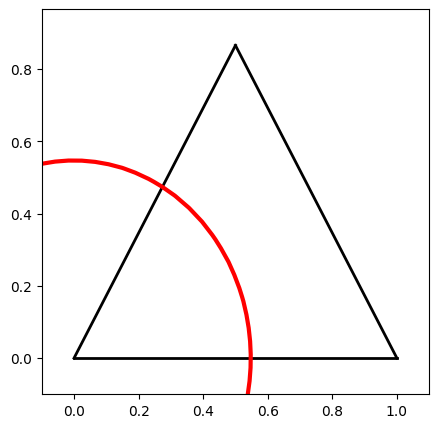

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example usage
# Define level-set function (replace with your own function)
def interface_func(x, y):
    return x**2 + y**2 - 0.3  # Circle with radius 1 centered at the origin

# Example triangle element with node coordinates
Xe = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 0.8660254]])  # Equilateral triangle
n = len(Xe[:,0])
Xmin = np.min(Xe[:,0])-0.1
Xmax = np.max(Xe[:,0])+0.1
Ymin = np.min(Xe[:,1])-0.1
Ymax = np.max(Xe[:,1])+0.1

# Evaluate level-set
xgrid = np.linspace(Xmin,Xmax,30)
ygrid = np.linspace(Ymin,Ymax,30)
Xgrid, Ygrid = np.meshgrid(xgrid,ygrid,indexing='ij')
LS = interface_func(Xgrid,Ygrid)

fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.set_xlim(Xmin,Xmax)
axs.set_ylim(Ymin,Ymax)

for iedge in range(n):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%n),0]],[Xe[iedge,1],Xe[int((iedge+1)%n),1]], color='black', linewidth=2)

axs.contour(Xgrid,Ygrid,LS, levels = [0], colors='red', linewidths = 3)


In [ ]:
def find_intersection_points(nodes, level_set_values):
    intersection_points = []
    for i in range(3):  # Loop through edges of the triangle
        # Check for sign change along the edge
        if level_set_values[i] * level_set_values[(i + 1) % 3] < 0:
            # Interpolate to find intersection point
            t = level_set_values[i] / (level_set_values[i] - level_set_values[(i + 1) % 3])
            intersection_point = (1 - t) * nodes[i] + t * nodes[(i + 1) % 3]
            intersection_points.append(intersection_point)
    return intersection_points

# Find intersection points
intersection_points = find_intersection_points(Xe, LSe)

# Print intersection points
print("Intersection Points:")
for point in intersection_points:
    print(point)